# Data Analysis
## Class 5
### Data cleaning and Exploratory Data Analysis
#### September 18th

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request

data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
local_filename = 'namesbystate.zip'

if not os.path.exists(local_filename):
    with urllib.request.urlopen(data_url) as resp, open(local_filename), 'wb' as f:
        f.write(resp.read())

In [2]:
import zipfile

zf = zipfile.ZipFile('namesbystate.zip', 'r')
ca_name = 'STATE.CA.TXT'
fields = ['State', 'Sex', 'Year', 'Name', 'Count']

with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=fields)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [3]:
first_ten_rows = babynames.loc[:9, :]

We can use binary commands to obtain only a few rows, and also use logical conditions 

In [4]:
first_ten_rows[[True, True, False, True, True, False, True, False, True, True]]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
6,CA,F,1910,Evelyn,126
8,CA,F,1910,Virginia,101
9,CA,F,1910,Elizabeth,93


In [5]:
logical_operator = (babynames['Name'] == 'Francis')

logical_operator

0         False
1         False
2         False
3         False
4         False
          ...  
407423    False
407424    False
407425    False
407426    False
407427    False
Name: Name, Length: 407428, dtype: bool

In [6]:
babynames[logical_operator]

,State,Sex,Year,Name,Count
214,CA,F,1910,Francis,5
715,CA,F,1912,Francis,7
1732,CA,F,1915,Francis,11
2322,CA,F,1916,Francis,6
2708,CA,F,1917,Francis,10
...,...,...,...,...,...
393638,CA,M,2018,Francis,66
396632,CA,M,2019,Francis,45
399450,CA,M,2020,Francis,51
402164,CA,M,2021,Francis,64


In [7]:
babynames.loc[babynames['Sex'] == 'F']

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
239532,CA,F,2022,Zemira,5
239533,CA,F,2022,Ziggy,5
239534,CA,F,2022,Zimal,5
239535,CA,F,2022,Zosia,5


and &

or |

In [8]:
babynames[(babynames['Sex'] == 'F') & (babynames['Year'] < 2000)]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
149050,CA,F,1999,Zareen,5
149051,CA,F,1999,Zeinab,5
149052,CA,F,1999,Zhane,5
149053,CA,F,1999,Zoha,5


In [9]:
babynames[(babynames['Name'] == 'Mary') |
          (babynames['Name'] == 'Kimberly') |
          (babynames['Name'] == 'Lisa') |
          (babynames['Name'] == 'Anne')]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
75,CA,F,1910,Anne,23
233,CA,F,1911,Mary,390
285,CA,F,1911,Anne,34
484,CA,F,1912,Mary,534
...,...,...,...,...,...
331921,CA,M,1995,Kimberly,7
333594,CA,M,1996,Kimberly,16
339305,CA,M,1998,Kimberly,7
352529,CA,M,2003,Kimberly,5


Return if Name is in the list names

In [10]:
names = ['Mary', 'Kimberly', 'Lisa', 'Anne']
babynames[babynames['Name'].isin(names)]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
75,CA,F,1910,Anne,23
233,CA,F,1911,Mary,390
285,CA,F,1911,Anne,34
484,CA,F,1912,Mary,534
...,...,...,...,...,...
331921,CA,M,1995,Kimberly,7
333594,CA,M,1996,Kimberly,16
339305,CA,M,1998,Kimberly,7
352529,CA,M,2003,Kimberly,5


%timeit repite 100 times a function to obtain a mean of how much time does the function takes

In [11]:
%timeit babynames['Name'].isin(names)

11.4 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
babynames.shape
operation = 407428 * 4 #407428 lenght of dataframe * 4 lenght of the list names
operation_per_ms = operation / 12.9 # 12.9 the number of ms
operation_per_ms

126334.26356589147

In [13]:
babynames[babynames['Name'].str.startswith('N')]

,State,Sex,Year,Name,Count
76,CA,F,1910,Norma,23
83,CA,F,1910,Nellie,20
127,CA,F,1910,Nina,11
198,CA,F,1910,Nora,6
310,CA,F,1911,Nellie,23
...,...,...,...,...,...
407319,CA,M,2022,Nilan,5
407320,CA,M,2022,Niles,5
407321,CA,M,2022,Nolen,5
407322,CA,M,2022,Noriel,5


.describe returns only information the columns with numbers data

In [14]:
babynames.describe()

,Year,Count
count,407428.000000,407428.000000
mean,1985.733609,79.543456
std,27.007660,293.698654
min,1910.000000,5.000000
25%,1969.000000,7.000000
50%,1992.000000,13.000000
75%,2008.000000,38.000000
max,2022.000000,8260.000000


describe also works with object's columns

In [15]:
babynames['Sex'].describe()

count     407428
unique         2
top            F
freq      239537
Name: Sex, dtype: object

Sample return some number of samples take it randomly

In [16]:
babynames.sample()

,State,Sex,Year,Name,Count
56805,CA,F,1967,Maryhelen,5


In [17]:
babynames[babynames['Year']==2000].sample(5).iloc[:,2:]

,Year,Name,Count
344901,2000,Rohith,5
150104,2000,Yessica,28
150405,2000,Ireland,19
343091,2000,Osbaldo,33
151856,2000,Rain,7


sort_values based on a condition, and can use ascending True or False

reset_index change the index based on the condition, and it agregate a column 'index' with the original index

In [18]:
babynames.sort_values('Name', ascending=False).reset_index()

,index,State,Sex,Year,Name,Count
0,404544,CA,M,2021,Zyrus,5
1,197529,CA,F,2011,Zyrah,5
2,220691,CA,F,2017,Zyrah,6
3,232167,CA,F,2020,Zyrah,5
4,217429,CA,F,2016,Zyrah,5
...,...,...,...,...,...,...
407423,362040,CA,M,2007,Aaden,20
407424,398211,CA,M,2019,Aadarsh,6
407425,366001,CA,M,2008,Aadan,7
407426,369120,CA,M,2009,Aadan,6


We can agregate lambda function's as criteria to sort_values

In [19]:
babynames.sort_values('Name', key=lambda x: x.str.len(), ascending=False).head(7)

,State,Sex,Year,Name,Count
334166,CA,M,1996,Franciscojavier,8
337301,CA,M,1997,Franciscojavier,5
339472,CA,M,1998,Franciscojavier,6
321792,CA,M,1991,Ryanchristopher,7
327358,CA,M,1993,Johnchristopher,5
321913,CA,M,1991,Franciscojavier,6
344440,CA,M,2000,Franciscojavier,6


In [20]:
fem_babynames = babynames[babynames['Sex'] == 'F']
fem_babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
239532,CA,F,2022,Zemira,5
239533,CA,F,2022,Ziggy,5
239534,CA,F,2022,Zimal,5
239535,CA,F,2022,Zosia,5


In [21]:
import plotly.express as px
fig = px.line(fem_babynames[fem_babynames['Name'] == 'Clara'], x='Year', y='Count')
fig.update_layout(font_size=18)

In [22]:
fem_babynames = fem_babynames.sort_values(['Year', 'Count'])
fem_babynames.head()

,State,Sex,Year,Name,Count
203,CA,F,1910,Adelaide,5
204,CA,F,1910,Adele,5
205,CA,F,1910,Adrienne,5
206,CA,F,1910,Althea,5
207,CA,F,1910,Antonia,5


In [23]:
fem_babynames[fem_babynames['Name'] == 'Lisa']

,State,Sex,Year,Name,Count
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
17718,CA,F,1940,Lisa,7
18524,CA,F,1941,Lisa,7
...,...,...,...,...,...
221874,CA,F,2018,Lisa,52
225530,CA,F,2019,Lisa,56
229635,CA,F,2020,Lisa,26
232916,CA,F,2021,Lisa,44


In [24]:
fem_babynames['Name'].value_counts()

Clara        113
Jennie       113
Ella         113
Emily        113
Geraldine    113
            ... 
Kristol        1
Laylene        1
Leilaney       1
Lezli          1
Debanhi        1
Name: Name, Length: 13782, dtype: int64

In [25]:
fem_babynames.groupby('Name').ngroups

13782

In [26]:
fem_babynames.groupby('Name').groups

{'Aadhini': [238687], 'Aadhira': [220330, 223283, 231343, 234746, 239045], 'Aadhya': [180380, 188452, 196071, 198837, 202620, 206542, 210341, 214361, 218182, 221936, 225694, 229384, 233165, 236750], 'Aadya': [175389, 188108, 192283, 195599, 199377, 203782, 206873, 210759, 214622, 218618, 222315, 226077, 229652, 233404, 237294], 'Aahana': [179961, 184195, 188109, 191399, 196313, 199088, 203943, 207641, 216026, 219537, 222277, 226973, 235342, 238411], 'Aahna': [208337], 'Aaira': [224072, 228084, 231727, 237879], 'Aairah': [220692], 'Aalani': [235000, 238412], 'Aalaya': [209031], 'Aalayah': [184196, 192973, 196314, 201062, 205032, 212333, 216229, 220074, 224413, 226730, 231728, 233878, 238413], 'Aaleah': [192974, 209032, 216889], 'Aaleyah': [180381, 188110, 190991, 195371, 199038, 203650, 207199, 211051, 215862, 219133, 223284, 226731, 230034, 234193], 'Aalia': [176140, 196984, 204115, 208338, 216230, 219854, 224414, 227733, 235343, 239046], 'Aaliah': [155434, 163143, 166520, 169939, 1747

In [27]:
fem_babynames.groupby('Name').groups.keys()

dict_keys(['Aadhini', 'Aadhira', 'Aadhya', 'Aadya', 'Aahana', 'Aahna', 'Aaira', 'Aairah', 'Aalani', 'Aalaya', 'Aalayah', 'Aaleah', 'Aaleyah', 'Aalia', 'Aaliah', 'Aaliya', 'Aaliyah', 'Aaliyha', 'Aalyah', 'Aalyiah', 'Aamina', 'Aaminah', 'Aamira', 'Aamiyah', 'Aanchal', 'Aanika', 'Aaniya', 'Aaniyah', 'Aanshi', 'Aanvi', 'Aanya', 'Aaradhya', 'Aaralyn', 'Aaria', 'Aariah', 'Aariana', 'Aarika', 'Aarin', 'Aarini', 'Aariyah', 'Aarna', 'Aarohi', 'Aaron', 'Aarti', 'Aarushi', 'Aarvi', 'Aarya', 'Aaryn', 'Aasha', 'Aashi', 'Aashna', 'Aashritha', 'Aashvi', 'Aastha', 'Aavya', 'Aayat', 'Aayla', 'Aayra', 'Aayushi', 'Abagail', 'Abbagail', 'Abbe', 'Abbey', 'Abbie', 'Abbigail', 'Abbigale', 'Abbigayle', 'Abby', 'Abbygail', 'Abbygale', 'Abbygayle', 'Abeer', 'Abegail', 'Abelina', 'Abella', 'Aberdeen', 'Abi', 'Abigael', 'Abigail', 'Abigal', 'Abigale', 'Abigayl', 'Abigayle', 'Abilene', 'Abisai', 'Abra', 'Abraham', 'Abrar', 'Abreanna', 'Abree', 'Abriana', 'Abrianna', 'Abriella', 'Abrielle', 'Abril', 'Abrina', 'Aby'

In [28]:
claras = fem_babynames.groupby('Name').get_group('Clara')
claras

,State,Sex,Year,Name,Count
41,CA,F,1910,Clara,37
292,CA,F,1911,Clara,29
529,CA,F,1912,Clara,52
842,CA,F,1913,Clara,55
1193,CA,F,1914,Clara,49
...,...,...,...,...,...
221348,CA,F,2018,Clara,235
225033,CA,F,2019,Clara,241
228687,CA,F,2020,Clara,229
232341,CA,F,2021,Clara,195


In [29]:
decades = list(range(1910, 2022, 10))
decades

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [30]:
claras[(claras['Year'] >= decades[0]) & (claras['Year'] < decades[0]+10)]

,State,Sex,Year,Name,Count
41,CA,F,1910,Clara,37
292,CA,F,1911,Clara,29
529,CA,F,1912,Clara,52
842,CA,F,1913,Clara,55
1193,CA,F,1914,Clara,49
1543,CA,F,1915,Clara,82
2000,CA,F,1916,Clara,87
2477,CA,F,1917,Clara,81
2955,CA,F,1918,Clara,86
3463,CA,F,1919,Clara,89


In [31]:
claras_decades = {}
for decade in range(len(decades)):
    claras_decades[decades[decade]] = (claras[(claras['Year'] >= decades[decade]) & (claras['Year'] < decades[decade]+10)])
claras_decades

{1910:      State Sex  Year   Name  Count
 41      CA   F  1910  Clara     37
 292     CA   F  1911  Clara     29
 529     CA   F  1912  Clara     52
 842     CA   F  1913  Clara     55
 1193    CA   F  1914  Clara     49
 1543    CA   F  1915  Clara     82
 2000    CA   F  1916  Clara     87
 2477    CA   F  1917  Clara     81
 2955    CA   F  1918  Clara     86
 3463    CA   F  1919  Clara     89,
 1920:      State Sex  Year   Name  Count
 3997    CA   F  1920  Clara     89
 4589    CA   F  1921  Clara     80
 5185    CA   F  1922  Clara     95
 5799    CA   F  1923  Clara     92
 6459    CA   F  1924  Clara     94
 7156    CA   F  1925  Clara     85
 7844    CA   F  1926  Clara     96
 8530    CA   F  1927  Clara     99
 9241    CA   F  1928  Clara     73
 9896    CA   F  1929  Clara     93,
 1930:       State Sex  Year   Name  Count
 10566    CA   F  1930  Clara     98
 11270    CA   F  1931  Clara     66
 11863    CA   F  1932  Clara     93
 12508    CA   F  1933  Clara     71
 13

In [32]:
claras_decades = {}
for decade in range(len(decades)):
    claras_decades[decades[decade]] = (claras[(claras['Year'] >= decades[decade]) & (claras['Year'] < decades[decade]+10)])['Count'].sum()
claras_decades

{1910: 647,
 1920: 896,
 1930: 685,
 1940: 602,
 1950: 602,
 1960: 449,
 1970: 390,
 1980: 534,
 1990: 1022,
 2000: 1289,
 2010: 2110,
 2020: 610}

In [33]:
claras_decades = np.array([[0,0]])
for decade in range(len(decades)):
    aux = (claras[(claras['Year'] >= decades[decade]) & (claras['Year'] < decades[decade]+10)])['Count'].sum()
    aux = np.array([[decades[decade], aux]])
    claras_decades = np.append(claras_decades, aux, axis=0)
claras_decades = np.delete(claras_decades, 0, 0)
claras_decades = pd.DataFrame(claras_decades, columns = ['Decade', 'Count'])
claras_decades

,Decade,Count
0,1910,647
1,1920,896
2,1930,685
3,1940,602
4,1950,602
5,1960,449
6,1970,390
7,1980,534
8,1990,1022
9,2000,1289


In [34]:
claras_decades['Count'].sum()

9836

## Class 6
### Data cleaning and Exploratory Data Analysis
#### September 20th

In [35]:
claras[(1900 < claras['Year']) & (claras['Year'] < 1919)]

,State,Sex,Year,Name,Count
41,CA,F,1910,Clara,37
292,CA,F,1911,Clara,29
529,CA,F,1912,Clara,52
842,CA,F,1913,Clara,55
1193,CA,F,1914,Clara,49
1543,CA,F,1915,Clara,82
2000,CA,F,1916,Clara,87
2477,CA,F,1917,Clara,81
2955,CA,F,1918,Clara,86


In [36]:
claras.Year.unique().min()

1910

In [37]:
claras.Year.unique().max()

2022

My solution

In [38]:
df_raul = []
for year in range(1910,2022,10):
    df_raul.append([year, claras[(year < claras['Year']) & (claras['Year'] <= year+9)]['Count'].sum()])
pd.DataFrame(df_raul,columns=['Year','Count'])


,Year,Count
0,1910,610
1,1920,807
2,1930,587
3,1940,533
4,1950,556
5,1960,387
6,1970,359
7,1980,470
8,1990,947
9,2000,1177


Jaime's solution

In [39]:
claras.groupby((claras['Year'] // 10 * 10)).sum()

,Year,Count
Year,,
1910,19145,647
1920,19245,896
1930,19345,685
1940,19445,602
1950,19545,602
1960,19645,449
1970,19745,390
1980,19845,534
1990,19945,1022


In [40]:
df_raul = []
for year in range(1910,2022,10):
    df_raul.append([year, claras[(claras['Year'] >= year) & (claras['Year'] < year+10)]['Count'].sum()])
pd.DataFrame(df_raul,columns=['Year','Count'])


,Year,Count
0,1910,647
1,1920,896
2,1930,685
3,1940,602
4,1950,602
5,1960,449
6,1970,390
7,1980,534
8,1990,1022
9,2000,1289


We need to take care how we define the ranges in the decades

We can use .agg('agregar funcion aqui')

In [41]:
claras.groupby((claras['Year'] // 10)).agg(sum)

,Year,Count
Year,,
191,19145,647
192,19245,896
193,19345,685
194,19445,602
195,19545,602
196,19645,449
197,19745,390
198,19845,534
199,19945,1022


In [42]:
jen = babynames.groupby('Name').get_group('Jennifer')
fig = px.line(jen, x='Year', y='Count')
fig.update_layout(font_size=18)

In [43]:
fem_babynames = babynames[babynames['Sex']=='F'].sort_values('Year')
jen = fem_babynames.groupby('Name').get_group('Jennifer')
fig = px.line(jen, x='Year', y='Count')
fig.update_layout(font_size=18)

maximum value from the 'Count' attribute

In [44]:
max_jen = max(jen['Count'])
max_jen

6065

Last value from the 'Count' attribute

In [45]:
current_jen = jen['Count'].iloc[-1]
current_jen

114

Ratio from the current count of jen with respect to her max count

In [46]:
current_jen / max_jen

0.018796372629843364

We define a function to obtain the ratio in a series

In [47]:
def ratio_to_peak(series):
    return series.iloc[-1] / max(series)

In [48]:
ratio_to_peak(jen['Count'])

0.018796372629843364

In [49]:
ratio_to_peak(fem_babynames[fem_babynames['Name'] == 'Lisa']['Count'])

0.01133832759667949

In [50]:
ratio_to_peak(fem_babynames.groupby('Name').get_group('Lisa')['Count'])

0.01133832759667949

We group by the name and then apply the ratio_to_peak function to each name

In [51]:
fem_babynames.groupby('Name').agg(ratio_to_peak)

/tmp/ipykernel_4396/3373756547.py:1: FutureWarning:

['State', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Year,Count
Name,,
Aadhini,1.0,1.000000
Aadhira,1.0,0.500000
Aadhya,1.0,0.660000
Aadya,1.0,0.586207
Aahana,1.0,0.269231
...,...,...
Zyanya,1.0,0.466667
Zyla,1.0,1.000000
Zylah,1.0,1.000000


In [52]:
%%time
rtp_table = fem_babynames.groupby('Name')[['Count']].agg(ratio_to_peak)
rtp_table

CPU times: user 388 ms, sys: 406 µs, total: 388 ms
Wall time: 1.15 s


,Count
Name,
Aadhini,1.000000
Aadhira,0.500000
Aadhya,0.660000
Aadya,0.586207
Aahana,0.269231
...,...
Zyanya,0.466667
Zyla,1.000000
Zylah,1.000000


In [53]:
rtp_table = rtp_table.rename(columns={'Count': 'Count RTP'})
rtp_table

,Count RTP
Name,
Aadhini,1.000000
Aadhira,0.500000
Aadhya,0.660000
Aadya,0.586207
Aahana,0.269231
...,...
Zyanya,0.466667
Zyla,1.000000
Zylah,1.000000


In [54]:
rtp_table.sort_values('Count RTP')

,Count RTP
Name,
Debra,0.001260
Debbie,0.002815
Carol,0.003180
Tammy,0.003249
Susan,0.003305
...,...
Fidelia,1.000000
Naveyah,1.000000
Finlee,1.000000


In [55]:
def plot_name(*names):
    return px.line(fem_babynames[fem_babynames['Name'].isin(names)],
                   x='Year',y='Count', color='Name', title=f'Popularity for: {names}')
plot_name('Debbie')

In [56]:
top10 = rtp_table.sort_values('Count RTP').tail(10).index
top10

Index(['Fia', 'Fiadh', 'Navina', 'Fianna', 'Navid', 'Fidelia', 'Naveyah',
       'Finlee', 'Roseline', 'Aadhini'],
      dtype='object', name='Name')

In [57]:
plot_name(*top10)

In [58]:
def decade_name(names):
    return babynames[babynames['Name'].isin(names)].groupby(['Name', (babynames['Year'] // 10 * 10)]).agg(sum)

In [59]:
decade_name(['Clara'])

Year  Count
Name  Year              
Clara 1910  19145    647
      1920  19245    896
      1930  19345    685
      1940  19445    602
      1950  19545    602
      1960  19645    449
      1970  19745    390
      1980  19845    534
      1990  19945   1022
      2000  20045   1289
      2010  20145   2110
      2020   6063    610

In [60]:
decade_name(['Clara', 'Lisa'])

Year  Count
Name  Year              
Clara 1910  19145    647
      1920  19245    896
      1930  19345    685
      1940  19445    602
      1950  19545    602
      1960  19645    449
      1970  19745    390
      1980  19845    534
      1990  19945   1022
      2000  20045   1289
      2010  20145   2110
      2020   6063    610
Lisa  1930   5807     18
      1940  19445    341
      1950  23462  11300
      1960  37324  43845
      1970  37517  21666
      1980  31753  11797
      1990  19945   4168
      2000  20045   1077
      2010  20145    606
      2020   6063    126

In [61]:
decade_name(top10)

Year  Count
Name     Year              
Aadhini  2020   2022      6
Fia      2010   2014      5
         2020   4043     14
Fiadh    2020   4041     16
Fianna   2000   2007      5
Fidelia  1960   1963      5
         1990   1993      5
Finlee   2010   2018      5
         2020   2021      7
Naveyah  2010   2010      5
Navid    1980   9929     43
         1990  21935     94
         2000  12023     42
         2010  10080     30
Navina   2010   2011      6
Roseline 2010   6045     15
         2020   2022      8

In [62]:
babynames[babynames['Name'].isin(['Clara'])].groupby(['Name',(babynames['Year']//10*10)]).sum()['Count']/10

Name   Year
Clara  1910     64.7
       1920     89.6
       1930     68.5
       1940     60.2
       1950     60.2
       1960     44.9
       1970     39.0
       1980     53.4
       1990    102.2
       2000    128.9
       2010    211.0
       2020     61.0
Name: Count, dtype: float64

In [63]:
def decade_name(names):
    aux = babynames[babynames['Name'].isin(names)].groupby(['Name', (babynames['Year'] // 10 * 10)]).agg(sum)
    
    return aux.assign(Means = aux['Count'] / 10)

In [64]:
decade_name(['Clara'])

Year  Count  Means
Name  Year                     
Clara 1910  19145    647   64.7
      1920  19245    896   89.6
      1930  19345    685   68.5
      1940  19445    602   60.2
      1950  19545    602   60.2
      1960  19645    449   44.9
      1970  19745    390   39.0
      1980  19845    534   53.4
      1990  19945   1022  102.2
      2000  20045   1289  128.9
      2010  20145   2110  211.0
      2020   6063    610   61.0

In [65]:
decade_name(['Clara', 'Lisa'])

Year  Count   Means
Name  Year                      
Clara 1910  19145    647    64.7
      1920  19245    896    89.6
      1930  19345    685    68.5
      1940  19445    602    60.2
      1950  19545    602    60.2
      1960  19645    449    44.9
      1970  19745    390    39.0
      1980  19845    534    53.4
      1990  19945   1022   102.2
      2000  20045   1289   128.9
      2010  20145   2110   211.0
      2020   6063    610    61.0
Lisa  1930   5807     18     1.8
      1940  19445    341    34.1
      1950  23462  11300  1130.0
      1960  37324  43845  4384.5
      1970  37517  21666  2166.6
      1980  31753  11797  1179.7
      1990  19945   4168   416.8
      2000  20045   1077   107.7
      2010  20145    606    60.6
      2020   6063    126    12.6

In [66]:
decade_name(top10)

Year  Count  Means
Name     Year                     
Aadhini  2020   2022      6    0.6
Fia      2010   2014      5    0.5
         2020   4043     14    1.4
Fiadh    2020   4041     16    1.6
Fianna   2000   2007      5    0.5
Fidelia  1960   1963      5    0.5
         1990   1993      5    0.5
Finlee   2010   2018      5    0.5
         2020   2021      7    0.7
Naveyah  2010   2010      5    0.5
Navid    1980   9929     43    4.3
         1990  21935     94    9.4
         2000  12023     42    4.2
         2010  10080     30    3.0
Navina   2010   2011      6    0.6
Roseline 2010   6045     15    1.5
         2020   2022      8    0.8

We eliminate the names that the sum of the counts is less than 100

In [89]:
less100 = fem_babynames['Name'].unique()[fem_babynames.groupby('Name')['Count'].sum()>100]

In [90]:
indexes_to_eliminate = fem_babynames[fem_babynames['Name'].isin(less100)].index
indexes_to_eliminate

Int64Index([   149,    150,    151,    159,    161,    162,    163,    165,
               173,    119,
            ...
            237062, 237063, 237065, 237066, 237067, 237068, 237069, 237072,
            237076, 239536],
           dtype='int64', length=92969)

In [91]:
new_babynames = fem_babynames.drop(fem_babynames[fem_babynames['Name'].isin(less100)].index)
new_babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
148,CA,F,1910,Merle,9
152,CA,F,1910,Victoria,9
153,CA,F,1910,Alyce,8
154,CA,F,1910,Angeline,8
...,...,...,...,...,...
237064,CA,F,2022,Erica,22
237070,CA,F,2022,Jayde,22
237071,CA,F,2022,Jehilyn,22
237073,CA,F,2022,Kit,22


In [92]:
new_babynames.groupby('Name').agg(ratio_to_peak)

/tmp/ipykernel_4396/856970199.py:1: FutureWarning:

['State', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Year,Count
Name,,
Aadhya,1.0,0.660000
Aadya,1.0,0.586207
Aahana,1.0,0.269231
Aahna,1.0,1.000000
Aairah,1.0,1.000000
...,...,...
Zyanya,1.0,0.466667
Zyla,1.0,1.000000
Zylah,1.0,1.000000


In [93]:
new_rtp_table = new_babynames.groupby('Name')[['Count']].agg(ratio_to_peak)
new_rtp_table

,Count
Name,
Aadhya,0.660000
Aadya,0.586207
Aahana,0.269231
Aahna,1.000000
Aairah,1.000000
...,...
Zyanya,0.466667
Zyla,1.000000
Zylah,1.000000


In [94]:
new_rtp_table = new_rtp_table.rename(columns={'Count': 'Count RTP'})
new_rtp_table

,Count RTP
Name,
Aadhya,0.660000
Aadya,0.586207
Aahana,0.269231
Aahna,1.000000
Aairah,1.000000
...,...
Zyanya,0.466667
Zyla,1.000000
Zylah,1.000000


In [95]:
new_rtp_table.sort_values('Count RTP')

,Count RTP
Name,
Carol,0.003180
Susan,0.003305
Tina,0.004280
Michele,0.004500
Pamela,0.004955
...,...
Evenny,1.000000
Evely,1.000000
Eveleen,1.000000


In [96]:
new_top10 = new_rtp_table.sort_values('Count RTP').tail(10).index
new_top10

Index(['Evolette', 'Navina', 'Navreet', 'Everett', 'Naydeli', 'Evenny',
       'Evely', 'Eveleen', 'Naveah', 'Kaytie'],
      dtype='object', name='Name')

In [97]:
plot_name(*new_top10)

# Data Analysis
## Class 7
### Data cleaning and Exploratory Data Analysis
#### September 25th

In [103]:
rtp_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13782 entries, Aadhini to Zyrah
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Count RTP  13782 non-null  float64
dtypes: float64(1)
memory usage: 215.3+ KB


In [102]:
rtp_table.groupby('Count RTP').ngroups

1648

Histogram

the algorithms have the internal function to calculate the bin size

Matplotlib

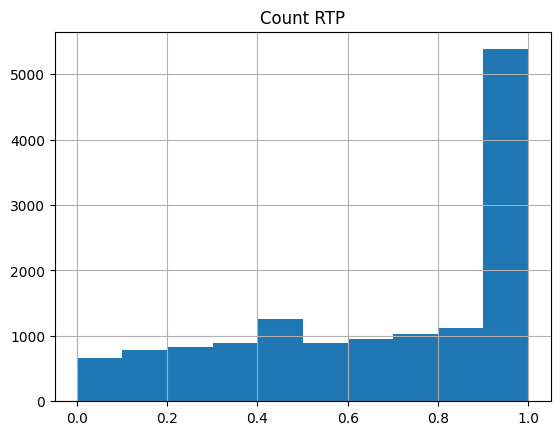

In [106]:
rtp_table.hist(); # The ; is no eliminate the string that prints the function

Px

In [105]:
px.histogram(rtp_table)

In [108]:
rtp_table[rtp_table['Count RTP'] == 1]

,Count RTP
Name,
Aadhini,1.0
Aahna,1.0
Aaira,1.0
Aairah,1.0
Aalani,1.0
...,...
Zya,1.0
Zyah,1.0
Zyla,1.0


In [116]:
sample_names = rtp_table[rtp_table['Count RTP'] == 1].sample(1000).index

In [117]:
plot_name(*sample_names)